## **``Hyper-Parameterization``**

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import imblearn

In [7]:
pd.set_option("display.max_columns",50)

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
breast_cancer = load_breast_cancer()

In [10]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
breast_cancer_df = pd.concat([pd.DataFrame(breast_cancer.data),pd.DataFrame(breast_cancer.target)],axis=1)

In [27]:
features = [val for val in breast_cancer.feature_names]

In [29]:
features.extend(['Label'])

In [30]:
features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'Label']

In [31]:
breast_cancer_df.columns = features

In [33]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## ***Cross-fold and Hyper-parameter***

In [168]:
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

In [101]:
breast_cancer_df.shape

(569, 31)

In [102]:
breast_cancer_df.iloc[:,0:-1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [105]:
X = breast_cancer_df.iloc[:,0:-1]
y = breast_cancer_df.iloc[:,-1]

In [113]:
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.15)

In [114]:
X_train.shape

(483, 30)

In [115]:
X_test.shape

(86, 30)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [327]:
knn = KNeighborsClassifier()

In [121]:
k_neighbors = np.arange(1,31)

In [328]:
weights = ['uniform','distance']

In [122]:
k_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [123]:
param_grid = dict(n_neighbors=k_neighbors)

In [329]:
param_dist = dict(n_neighbors=k_neighbors,weights=weights)

In [215]:
skf = StratifiedKFold(n_splits=4)

In [306]:
grid = GridSearchCV(estimator=knn,param_grid=param_grid,cv=skf,scoring=['f1','recall'],refit=False,n_jobs=None,)

In [307]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             refit=False, scoring=['f1', 'recall'])

In [308]:
results = grid.cv_results_

In [309]:
for val in results:
    print(val)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_f1
split1_test_f1
split2_test_f1
split3_test_f1
mean_test_f1
std_test_f1
rank_test_f1
split0_test_recall
split1_test_recall
split2_test_recall
split3_test_recall
mean_test_recall
std_test_recall
rank_test_recall


In [310]:
type(results)

dict

In [311]:
len(results['split0_test_f1'])

30

In [312]:
pd.DataFrame(results).sort_values('rank_test_recall').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall
29,0.005995,0.000001,0.016490,0.002060,30,{'n_neighbors': 30},0.909091,0.936709,0.938272,0.974026,0.939524,0.023055,24,0.986842,0.973684,1.0,0.986842,0.986842,0.009304,1
27,0.006496,0.001500,0.016241,0.001089,28,{'n_neighbors': 28},0.909091,0.936709,0.938272,0.974026,0.939524,0.023055,24,0.986842,0.973684,1.0,0.986842,0.986842,0.009304,1
26,0.006497,0.000500,0.016489,0.001499,27,{'n_neighbors': 27},0.909091,0.936709,0.938272,0.974026,0.939524,0.023055,24,0.986842,0.973684,1.0,0.986842,0.986842,0.009304,1
25,0.006495,0.000867,0.018239,0.001298,26,{'n_neighbors': 26},0.920245,0.936709,0.938272,0.974026,0.942313,0.019624,19,0.986842,0.973684,1.0,0.986842,0.986842,0.009304,1
24,0.005745,0.000829,0.016742,0.001479,25,{'n_neighbors': 25},0.909091,0.936709,0.938272,0.974026,0.939524,0.023055,24,0.986842,0.973684,1.0,0.986842,0.986842,0.009304,1


In [226]:
np.mean([0.923077,0.934211,0.955414,0.947368])

0.9400175

In [313]:
gscv_results = pd.DataFrame(results)

In [314]:
gscv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.011492,0.004385,0.021488,0.006261,1,{'n_neighbors': 1},0.923077,0.934211,0.955414,0.947368,0.940017,0.012367,23,0.947368,0.934211,0.986842,0.947368,0.953947,0.019737,28
1,0.006745,0.001298,0.015241,0.001088,2,{'n_neighbors': 2},0.927152,0.933333,0.934211,0.937931,0.933157,0.003873,30,0.921053,0.921053,0.934211,0.894737,0.917763,0.014338,30
2,0.007745,0.001478,0.018989,0.002549,3,{'n_neighbors': 3},0.937500,0.941176,0.937500,0.960000,0.944044,0.009334,16,0.986842,0.947368,0.986842,0.947368,0.967105,0.019737,27
3,0.006247,0.000434,0.016989,0.001870,4,{'n_neighbors': 4},0.949367,0.940397,0.948718,0.938776,0.944314,0.004768,15,0.986842,0.934211,0.973684,0.907895,0.950658,0.031380,29
4,0.005996,0.000707,0.015241,0.000433,5,{'n_neighbors': 5},0.943396,0.935065,0.944099,0.980392,0.950738,0.017486,3,0.986842,0.947368,1.000000,0.986842,0.980263,0.019737,14


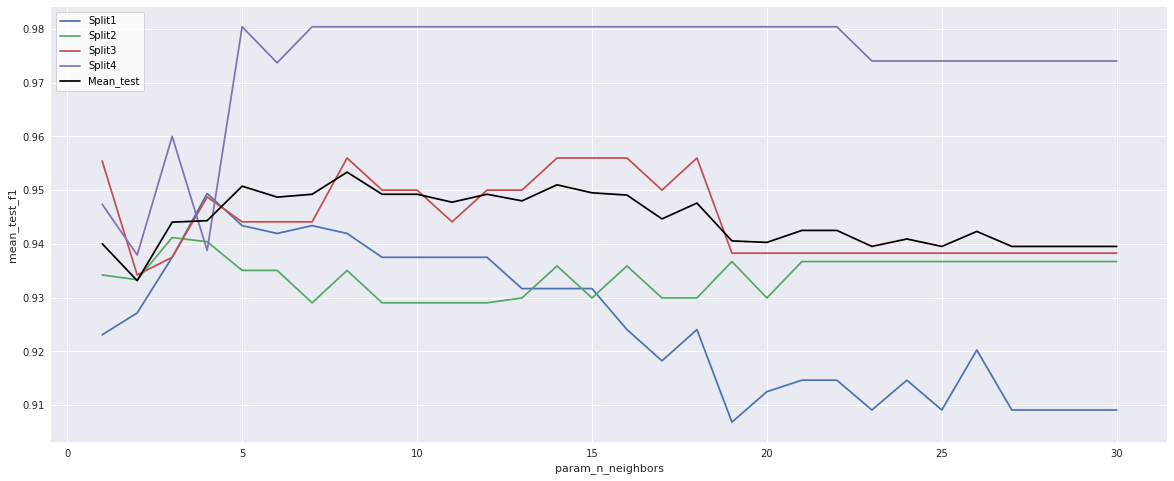

In [317]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,8))
    sns.lineplot(y='split0_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Split1')
    sns.lineplot(y='split1_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Split2')
    sns.lineplot(y='split2_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Split3')
    sns.lineplot(y='split3_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Split4')
    sns.lineplot(y='mean_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Mean_test',color='k')
plt.legend()
plt.show()

In [318]:
new_knn = KNeighborsClassifier(n_neighbors=7)

In [319]:
knn_model = new_knn.fit(X_train,y_train)

In [320]:
y_pred = knn_model.predict(X_test)

In [321]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [322]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [323]:
accuracy_score(y_test,y_pred)

0.9651162790697675

In [324]:
precision_score(y_test,y_pred)

0.9807692307692307

In [325]:
recall_score(y_test,y_pred)

0.9622641509433962

In [326]:
from sklearn.model_selection import RandomizedSearchCV

In [331]:
rscv = RandomizedSearchCV(estimator=knn,param_distributions=param_dist,n_iter=10,scoring='f1',cv=skf,n_jobs=-1)

In [336]:
%%time
rscv.fit(X_train,y_train)

Wall time: 556 ms


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1')

In [333]:
pd.DataFrame(rscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010742,0.000433,0.012243,0.001639,distance,14,"{'weights': 'distance', 'n_neighbors': 14}",0.937500,0.935897,0.950000,0.980392,0.950947,0.017855,1
1,0.009243,0.000829,0.030981,0.009022,uniform,7,"{'weights': 'uniform', 'n_neighbors': 7}",0.943396,0.929032,0.944099,0.980392,0.949230,0.018970,3
2,0.013491,0.004090,0.028233,0.009411,uniform,10,"{'weights': 'uniform', 'n_neighbors': 10}",0.937500,0.929032,0.950000,0.980392,0.949231,0.019476,2
3,0.010243,0.001638,0.039477,0.007821,uniform,16,"{'weights': 'uniform', 'n_neighbors': 16}",0.924051,0.935897,0.955975,0.980392,0.949079,0.021379,4
4,0.010493,0.002596,0.039226,0.011684,uniform,30,"{'weights': 'uniform', 'n_neighbors': 30}",0.909091,0.936709,0.938272,0.974026,0.939524,0.023055,9
5,0.009493,0.000500,0.013742,0.004490,distance,30,"{'weights': 'distance', 'n_neighbors': 30}",0.920245,0.936709,0.932515,0.974026,0.940874,0.020074,7
6,0.010743,0.002046,0.049220,0.024818,uniform,21,"{'weights': 'uniform', 'n_neighbors': 21}",0.914634,0.936709,0.938272,0.980392,0.942502,0.023789,6
7,0.010243,0.001638,0.042730,0.014925,uniform,6,"{'weights': 'uniform', 'n_neighbors': 6}",0.941935,0.935065,0.944099,0.973684,0.948696,0.014808,5
8,0.018616,0.012636,0.029860,0.005047,uniform,27,"{'weights': 'uniform', 'n_neighbors': 27}",0.909091,0.936709,0.938272,0.974026,0.939524,0.023055,9
9,0.009993,0.000707,0.013242,0.004490,distance,23,"{'weights': 'distance', 'n_neighbors': 23}",0.914634,0.929936,0.938272,0.980392,0.940809,0.024375,8
